In [1]:
import numpy as np
from numpy import loadtxt
from astropy.io import fits
import scipy.constants as cnt
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (10 , 5)

In [2]:
data = loadtxt('dados/test_3741_5.ares' , float) # loads the file with the data
fit_data = data[:,8] # an array with the fitted values of the wavelength
data_error = data[:,9] # an array with the error of the fitted values of the wavelength

In [3]:
filtro = fits.getdata("dados/ESPRESSO_G9.fits")
ori_lambda = filtro["lambda"]
ori_contrast = filtro["contrast"]

distances = np.abs(ori_lambda[:, np.newaxis] - data[:,0])
closest_indices = np.argmin(distances, axis=0)
ref_data = ori_lambda[closest_indices]
contrast = ori_contrast[closest_indices]

ARES_RV = -16600
CCF = -16648.286

# 229

In [4]:
lambda_ref = np.zeros(0)
lambda_fit_229 = np.zeros(0)
error = np.zeros(0)

for i, l in enumerate(ref_data):
    if contrast[i] >= 0.55:
        lambda_ref = np.append(lambda_ref,l)
        lambda_fit_229 = np.append(lambda_fit_229,fit_data[i])
        error = np.append(error,data_error[i])
    else:
        pass
    
N_dim_229 = np.zeros(3,dtype=int)
N_dim_229[0] = len(lambda_ref)

In [5]:
RV = (lambda_fit_229 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_229 = error / lambda_ref *cnt.c

mean = 197.87312 m/s ; standard deviation / √N = 93.04394 m/s
weighted mean = -32.95511 m/s ; weighted standard deviation / √N = 1.48943 m/s
median = -23.46628 m/s


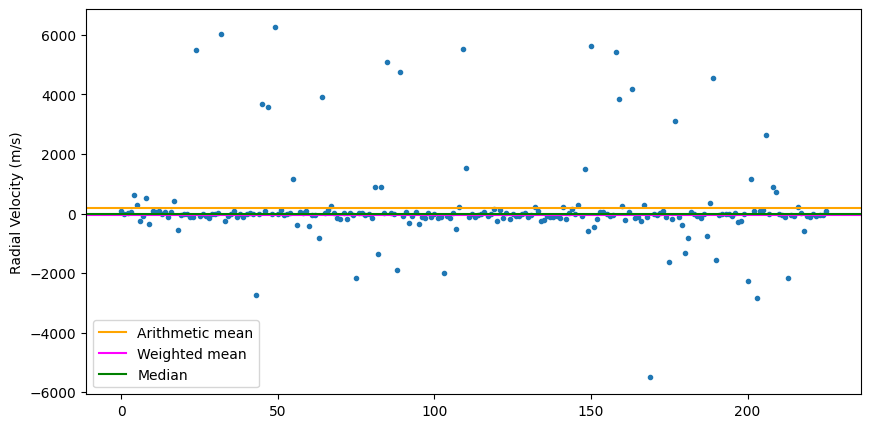

In [6]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_229
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV * pi * uncert_229 ** (-2)).sum() / (pi * uncert_229 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_229 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_229
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16402.12688 m/s ; standard deviation / √N = 93.04394 m/s
weighted mean = -16632.95511 m/s ; weighted standard deviation / √N = 1.48943 m/s
median = -16623.46628 m/s


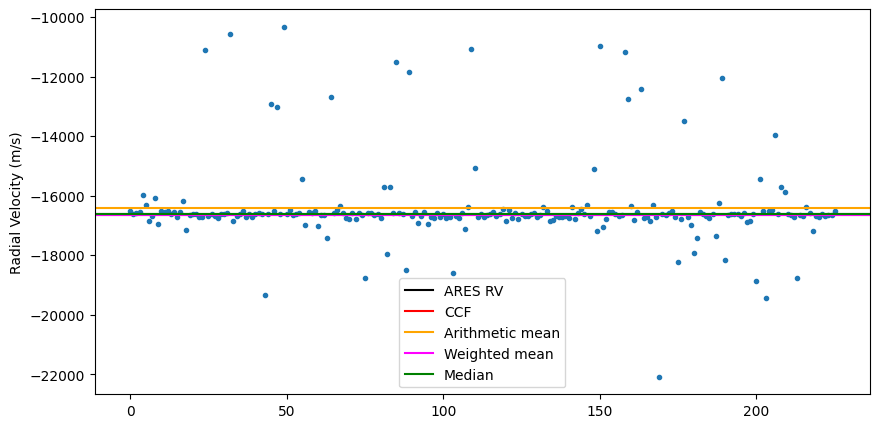

In [7]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = -73.62608 m/s ; standard deviation / √N = 35.34135 m/s
weighted mean = -34.11350 m/s ; weighted standard deviation / √N = 1.55299 m/s
median = -29.45166 m/s


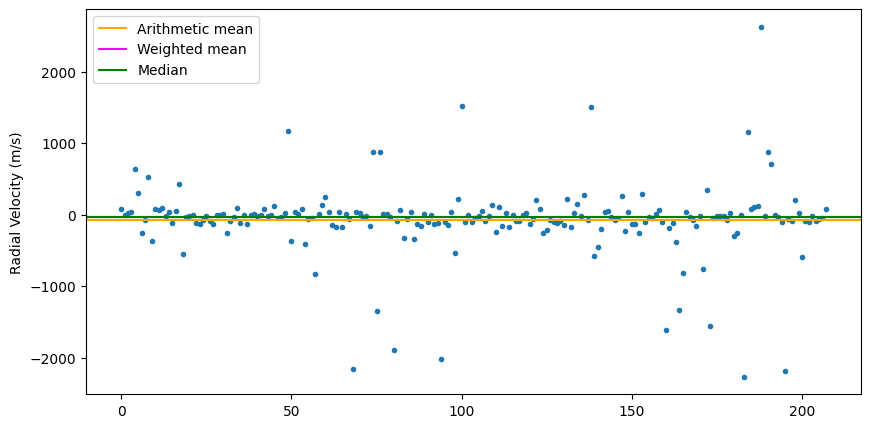

In [8]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_229[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_229[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16673.62608 m/s ; standard deviation / √N = 35.34135 m/s
weighted mean = -16634.11350 m/s ; weighted standard deviation / √N = 1.55299 m/s
median = -16629.45166 m/s


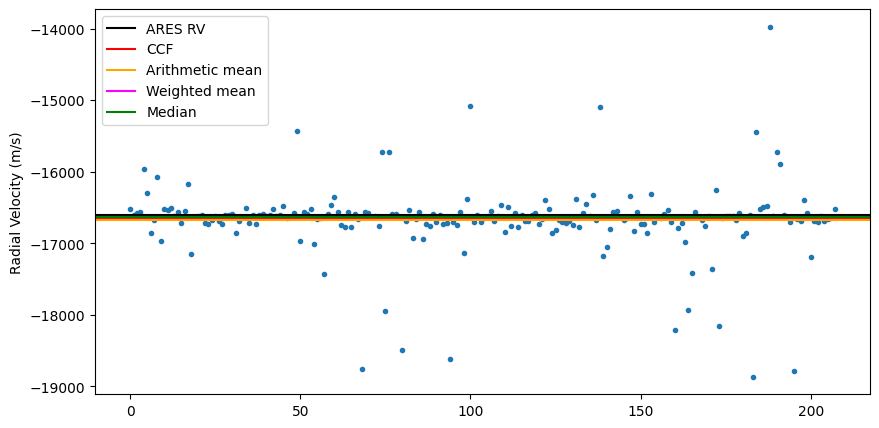

In [9]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -35.81752 m/s ; standard deviation / √N = 16.27901 m/s
weighted mean = -35.90468 m/s ; weighted standard deviation / √N = 1.61387 m/s
median = -26.39689 m/s


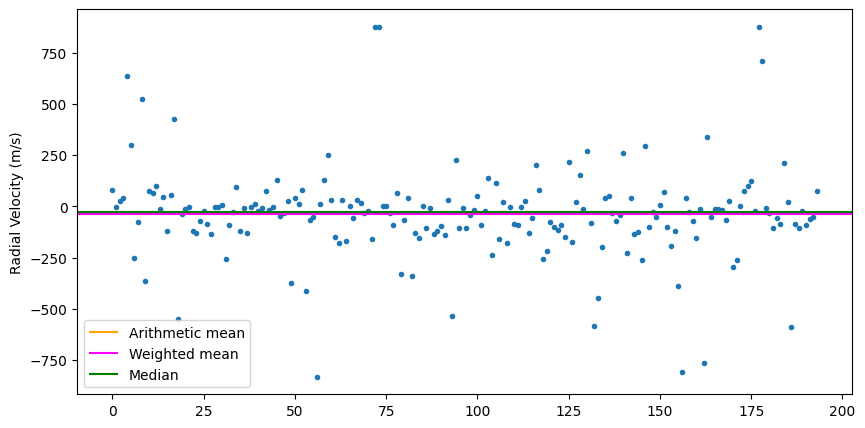

In [10]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr2_median = np.median(corr2RV)

mean_229 = corr2_mean
std_229 = corr2_std
wmean_229 = corr2_wmean
wstd_229 = corr2_wstd
median_229 = corr2_median

N_dim_229[2] = len(corr2RV)

STD = np.array([std,corr_std,corr2_std])

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16635.81752 m/s ; standard deviation / √N = 16.27901 m/s
weighted mean = -16635.90468 m/s ; weighted standard deviation / √N = 1.61387 m/s
median = -16626.39689 m/s


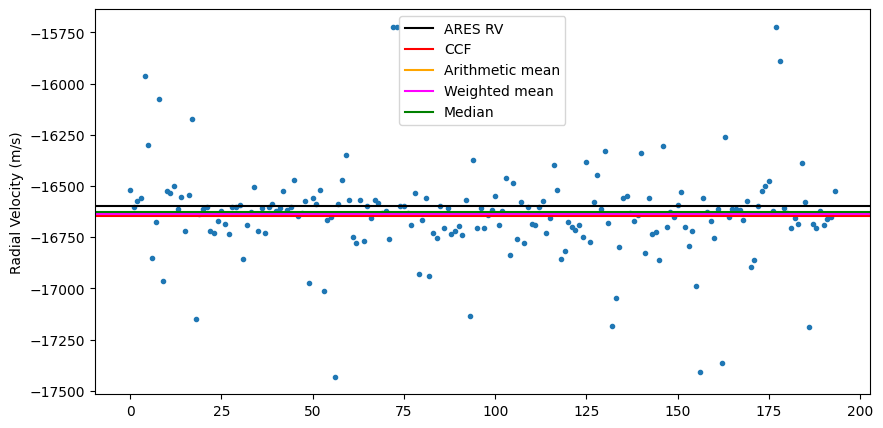

In [11]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## 595

In [12]:
lambda_ref = np.zeros(0)
lambda_fit_595 = np.zeros(0)
error = np.zeros(0)

for i, l in enumerate(ref_data):
    if contrast[i] >= 0.35:
        lambda_ref = np.append(lambda_ref,l)
        lambda_fit_595 = np.append(lambda_fit_595,fit_data[i])
        error = np.append(error,data_error[i])
    else:
        pass
    
N_dim_595 = np.zeros(3,dtype=int)
N_dim_595[0] = len(lambda_ref)

In [13]:
RV = (lambda_fit_595 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_595 = error / lambda_ref *cnt.c

mean = 185.74162 m/s ; standard deviation / √N = 49.31027 m/s
weighted mean = -29.30222 m/s ; weighted standard deviation / √N = 0.44692 m/s
median = -22.79847 m/s


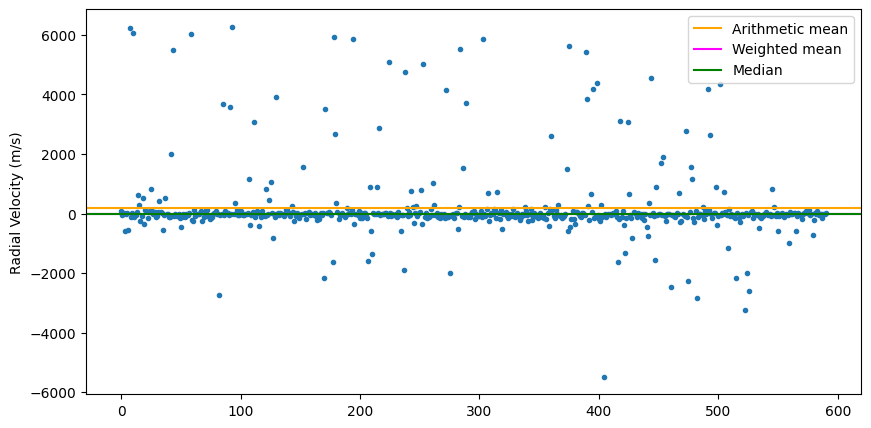

mean = -16414.25838 m/s ; standard deviation / √N = 49.31027 m/s
weighted mean = -16629.30222 m/s ; weighted standard deviation / √N = 0.44692 m/s
median = -16622.79847 m/s


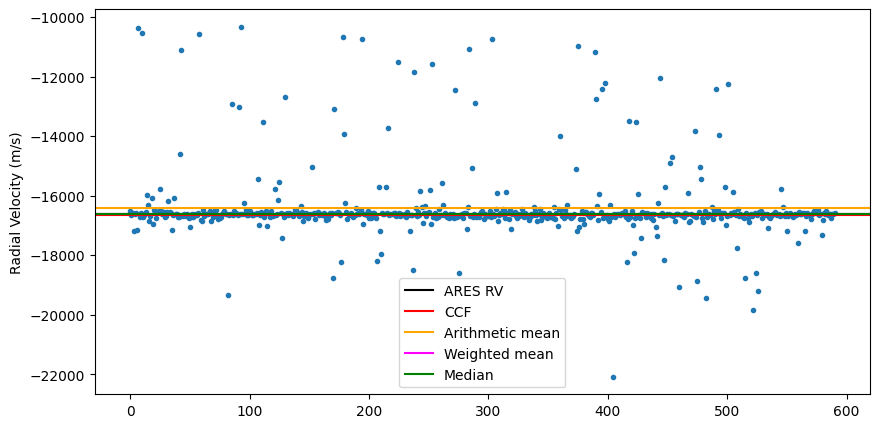

In [14]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_595
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV * pi * uncert_595 ** (-2)).sum() / (pi * uncert_595 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_595 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_595
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = -33.93509 m/s ; standard deviation / √N = 16.75087 m/s
weighted mean = -29.75167 m/s ; weighted standard deviation / √N = 0.46328 m/s
median = -27.86476 m/s


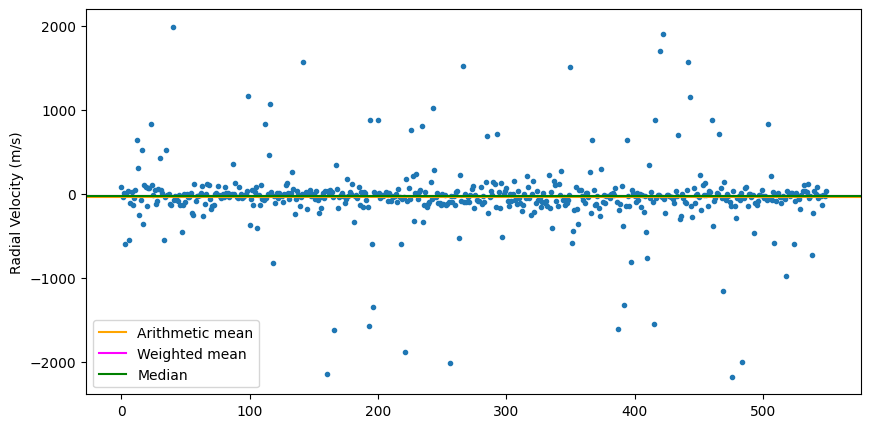

mean = -16633.93509 m/s ; standard deviation / √N = 16.75087 m/s
weighted mean = -16629.75167 m/s ; weighted standard deviation / √N = 0.46328 m/s
median = -16627.86476 m/s


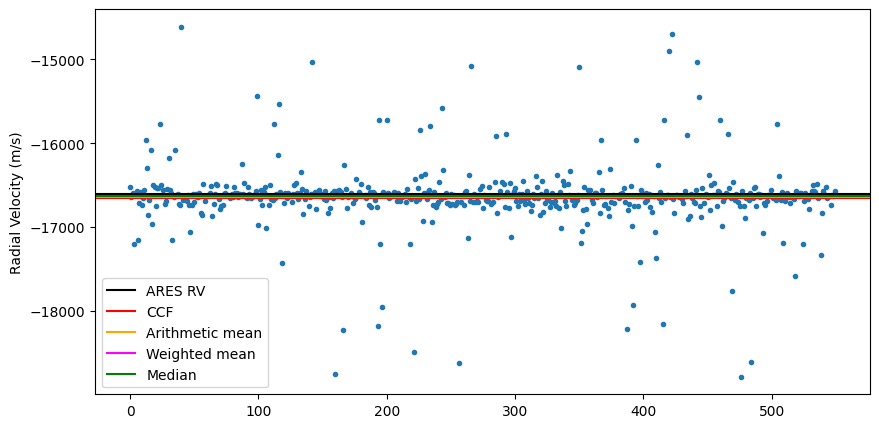

In [15]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_595[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_595[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -39.01482 m/s ; standard deviation / √N = 7.67977 m/s
weighted mean = -33.35309 m/s ; weighted standard deviation / √N = 0.47997 m/s
median = -28.96244 m/s


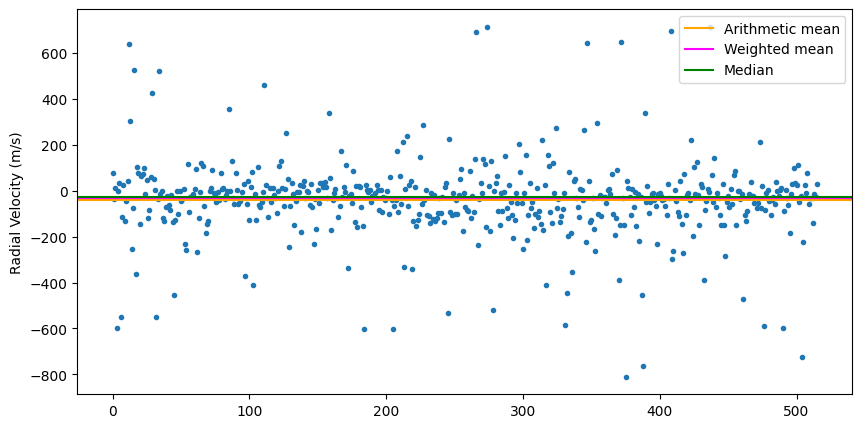

mean = -16639.01482 m/s ; standard deviation / √N = 7.67977 m/s
weighted mean = -16633.35309 m/s ; weighted standard deviation / √N = 0.47997 m/s
median = -16628.96244 m/s


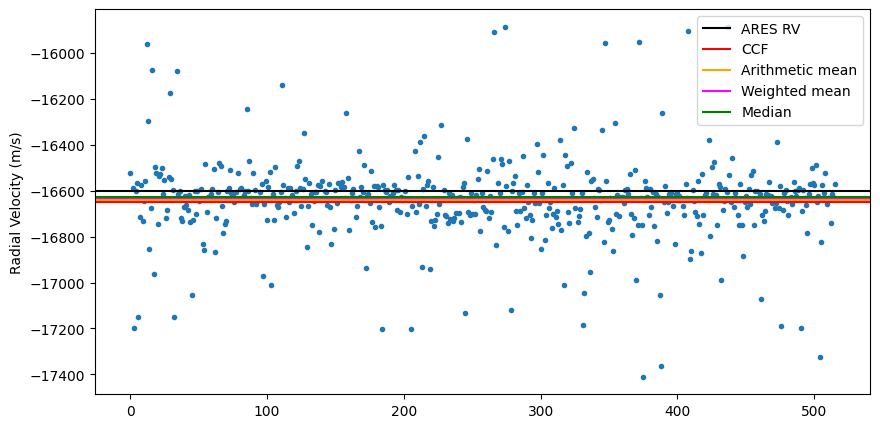

In [16]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr2_median = np.median(corr2RV)

mean_595 = corr2_mean
std_595 = corr2_std
wmean_595 = corr2_wmean
wstd_595 = corr2_wstd
median_595 = corr2_median

N_dim_595[2] = len(corr2RV)

STD = np.array([std,corr_std,corr2_std])

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# 1030

In [17]:
lambda_ref = np.zeros(0)
lambda_fit_1030 = np.zeros(0)
error = np.zeros(0)

for i, l in enumerate(ref_data):
    if contrast[i] >= 0.2:
        lambda_ref = np.append(lambda_ref,l)
        lambda_fit_1030 = np.append(lambda_fit_1030,fit_data[i])
        error = np.append(error,data_error[i])
    else:
        pass
    
N_dim_1030 = np.zeros(3,dtype=int)
N_dim_1030[0] = len(lambda_ref)

In [18]:
RV = (lambda_fit_1030 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_1030 = error / lambda_ref *cnt.c

mean = 194.67951 m/s ; standard deviation / √N = 35.41261 m/s
weighted mean = -19.11800 m/s ; weighted standard deviation / √N = 0.21854 m/s
median = -13.43789 m/s


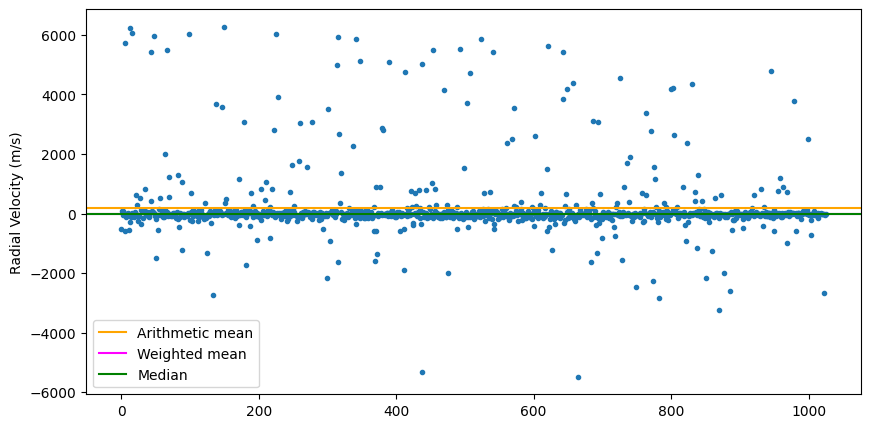

mean = -16405.32049 m/s ; standard deviation / √N = 35.41261 m/s
weighted mean = -16619.11800 m/s ; weighted standard deviation / √N = 0.21854 m/s
median = -16613.43789 m/s


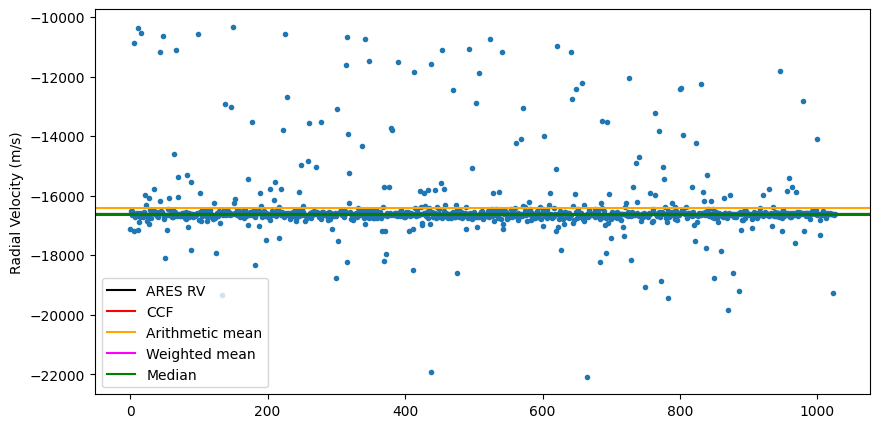

In [19]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_1030
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV * pi * uncert_1030 ** (-2)).sum() / (pi * uncert_1030 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_1030 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_1030
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = -1.86180 m/s ; standard deviation / √N = 12.14500 m/s
weighted mean = -19.65190 m/s ; weighted standard deviation / √N = 0.22582 m/s
median = -17.67295 m/s


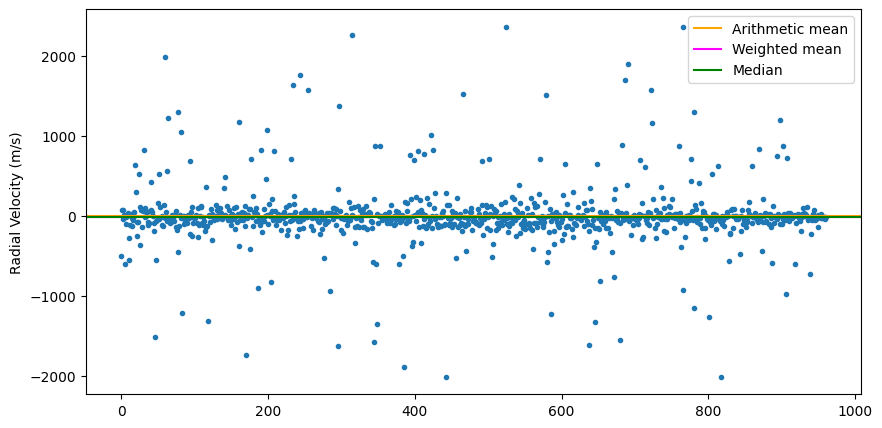

mean = -16601.86180 m/s ; standard deviation / √N = 12.14500 m/s
weighted mean = -16619.65190 m/s ; weighted standard deviation / √N = 0.22582 m/s
median = -16617.67295 m/s


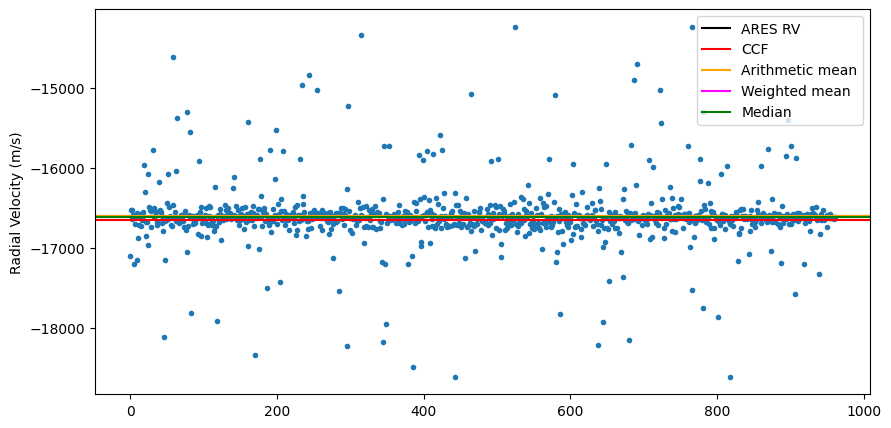

In [21]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_1030[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_1030[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = -18.67856 m/s ; standard deviation / √N = 5.67609 m/s
weighted mean = -22.13847 m/s ; weighted standard deviation / √N = 0.23367 m/s
median = -20.05156 m/s


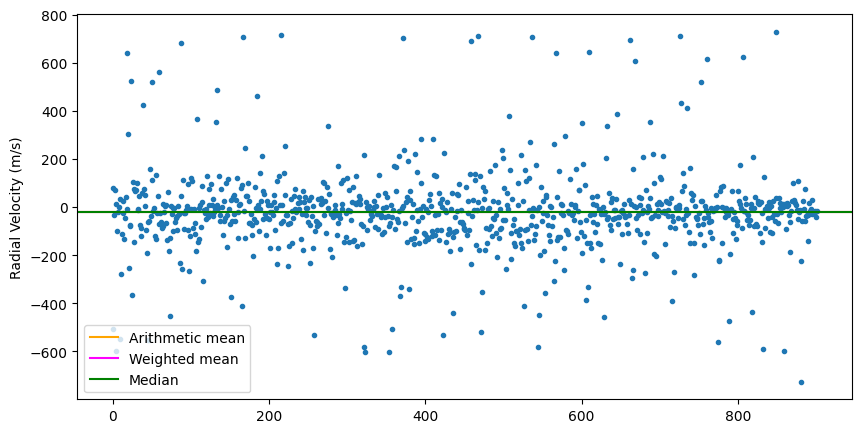

mean = -16618.67856 m/s ; standard deviation / √N = 5.67609 m/s
weighted mean = -16622.13847 m/s ; weighted standard deviation / √N = 0.23367 m/s
median = -16620.05156 m/s


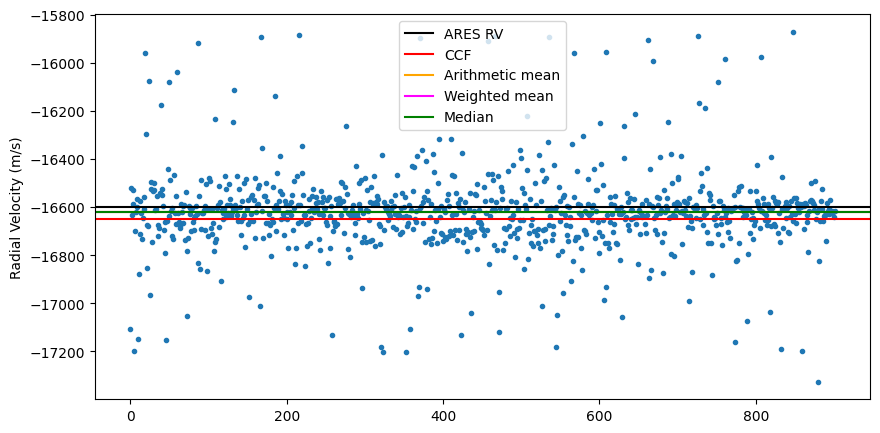

In [22]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr2_median = np.median(corr2RV)

mean_1030 = corr2_mean
std_1030 = corr2_std
wmean_1030 = corr2_wmean
wstd_1030 = corr2_wstd
median_1030 = corr2_median

N_dim_1030[2] = len(corr2RV)

STD = np.array([std,corr_std,corr2_std])

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

# 3741

In [23]:
lambda_ref = ref_data
lambda_fit_3741 = fit_data
error = data_error
    
N_dim_3741 = np.zeros(3,dtype=int)
N_dim_3741[0] = len(lambda_ref)

In [24]:
RV = (lambda_fit_3741 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_3741 = error / lambda_ref *cnt.c

mean = 200.44624 m/s ; standard deviation / √N = 21.17018 m/s
weighted mean = 26.71445 m/s ; weighted standard deviation / √N = 0.04251 m/s
median = -2.45596 m/s


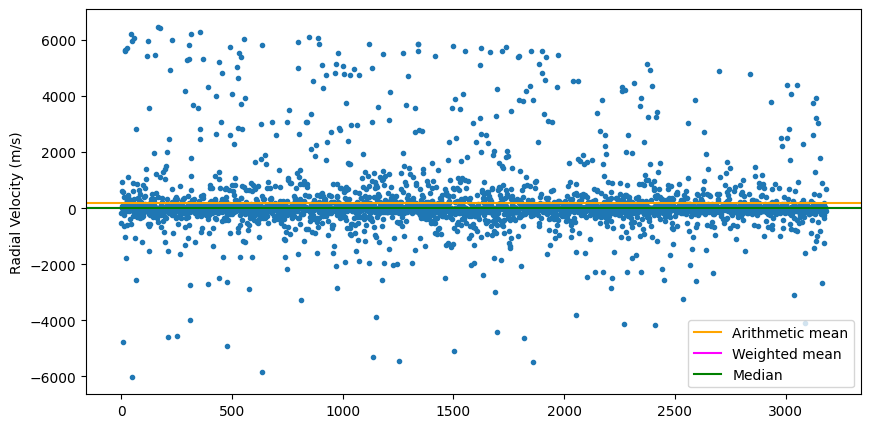

mean = -16399.55376 m/s ; standard deviation / √N = 21.17018 m/s
weighted mean = -16573.28555 m/s ; weighted standard deviation / √N = 0.04251 m/s
median = -16602.45596 m/s


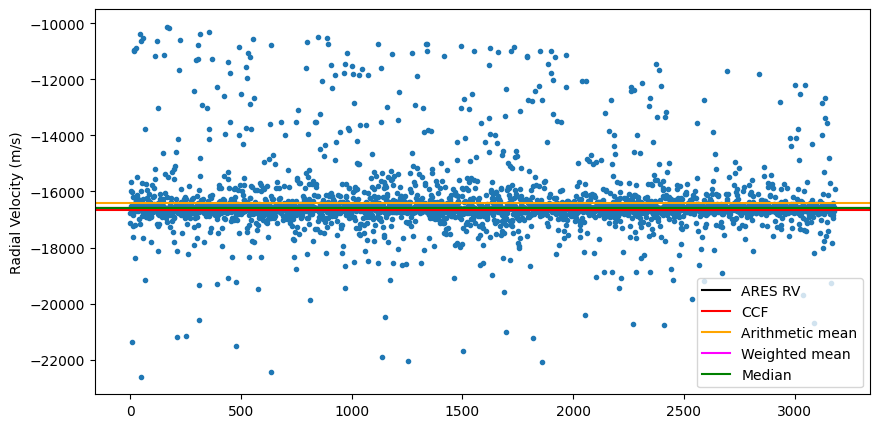

In [25]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_3741
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV * pi * uncert_3741 ** (-2)).sum() / (pi * uncert_3741 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_3741 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_3741
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers

mean = 25.59898 m/s ; standard deviation / √N = 9.32691 m/s
weighted mean = -5.89896 m/s ; weighted standard deviation / √N = 0.04254 m/s
median = -8.24823 m/s


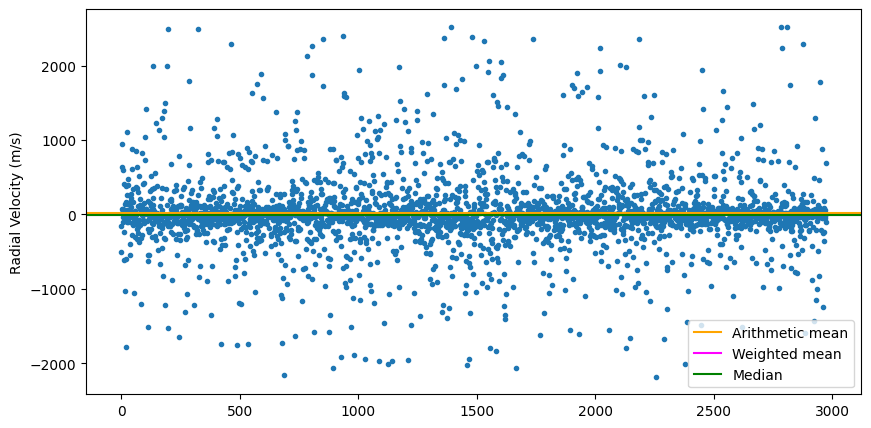

mean = -16574.40102 m/s ; standard deviation / √N = 9.32691 m/s
weighted mean = -16605.89896 m/s ; weighted standard deviation / √N = 0.04254 m/s
median = -16608.24823 m/s


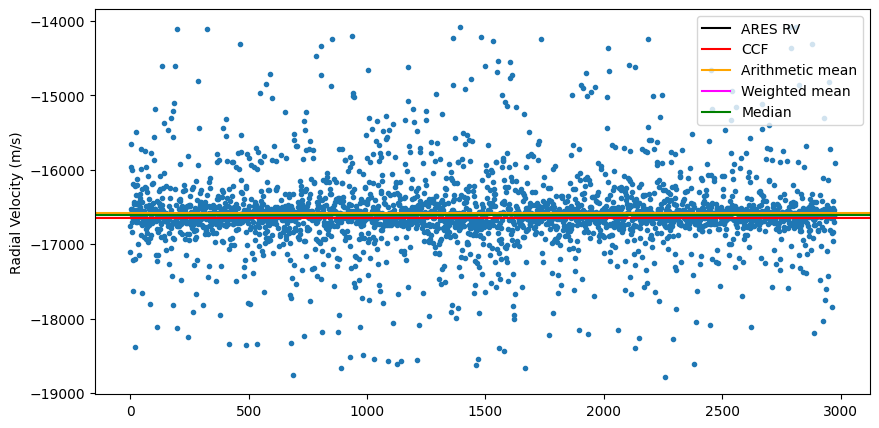

In [26]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_3741[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_3741[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Removing outliers (2)

mean = 6.67331 m/s ; standard deviation / √N = 5.77639 m/s
weighted mean = -9.05629 m/s ; weighted standard deviation / √N = 0.04404 m/s
median = -9.59525 m/s


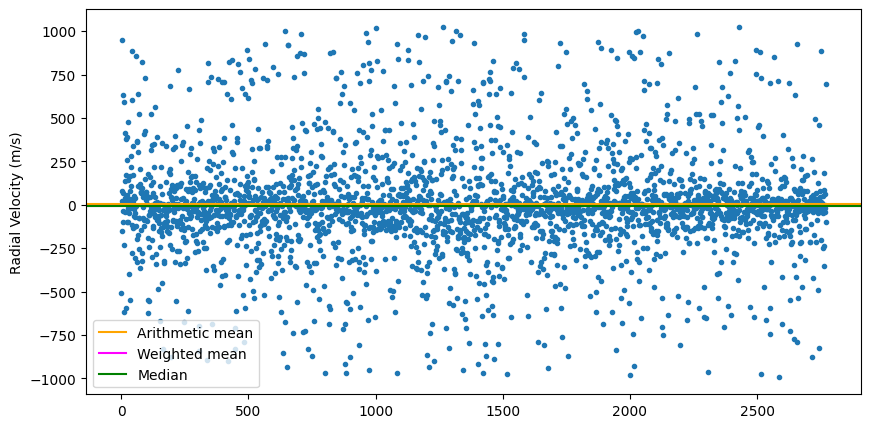

mean = -16593.32669 m/s ; standard deviation / √N = 5.77639 m/s
weighted mean = -16609.05629 m/s ; weighted standard deviation / √N = 0.04404 m/s
median = -16609.59525 m/s


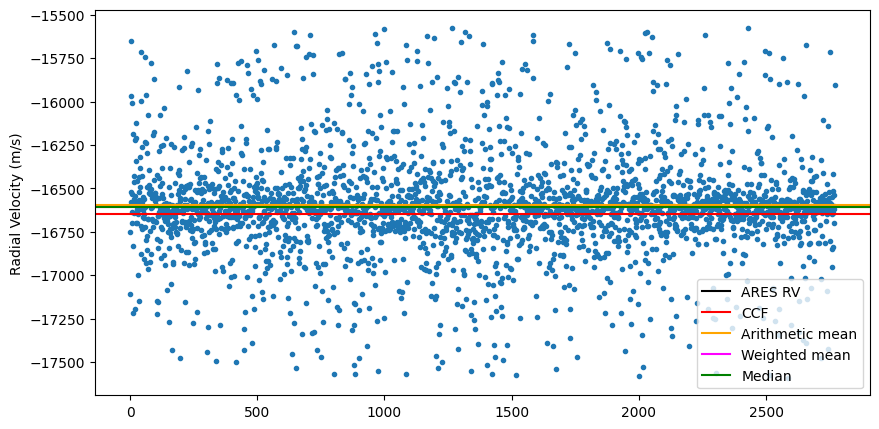

In [27]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr2_median = np.median(corr2RV)

mean_3741 = corr2_mean
std_3741 = corr2_std
wmean_3741 = corr2_wmean
wstd_3741 = corr2_wstd
median_3741 = corr2_median

N_dim_3741[2] = len(corr2RV)

STD = np.array([std,corr_std,corr2_std])

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Mean RV for a diferent number of initial wavelegnhts

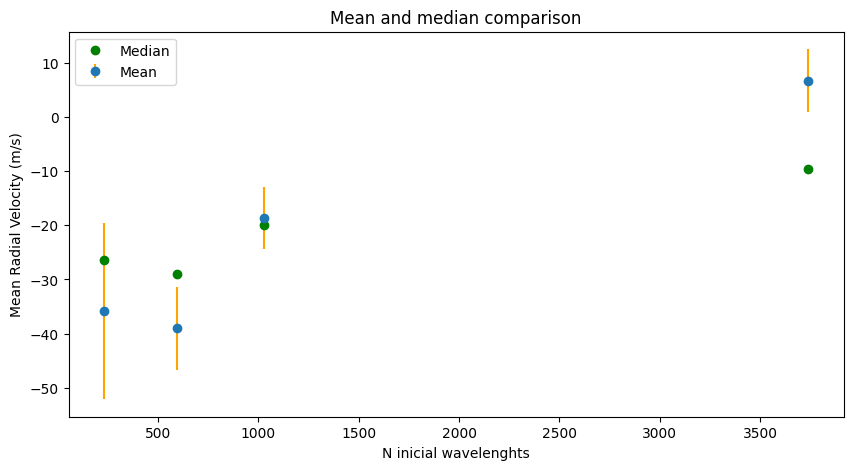

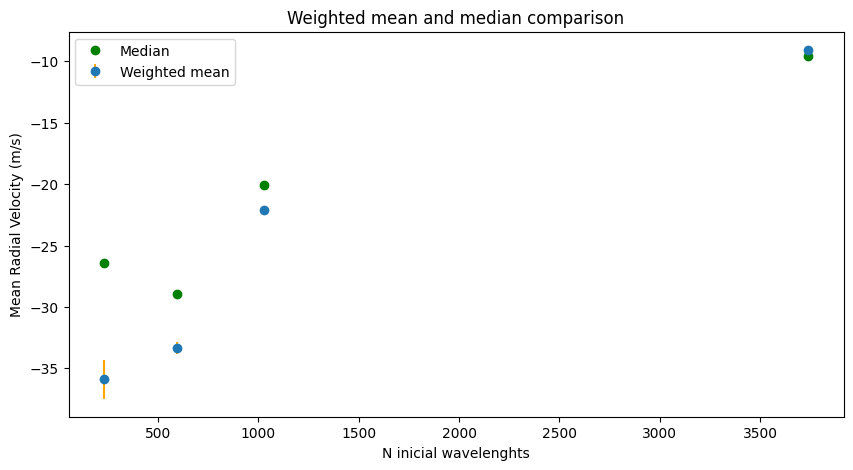

In [28]:
Means = np.array([mean_229,mean_595,mean_1030,mean_3741])
Std = np.array([std_229,std_595,std_1030,std_3741])
Wmeans = np.array([wmean_229,wmean_595,wmean_1030,wmean_3741])
Wstd = np.array([wstd_229,wstd_595,wstd_1030,wstd_3741])
Medians = np.array([median_229,median_595,median_1030,median_3741])

Std_root = np.array([std_229 / np.sqrt(N_dim_229[2]),std_595 / np.sqrt(N_dim_595[2]),std_1030 / np.sqrt(N_dim_1030[2]),std_3741 / np.sqrt(N_dim_3741[2])])
Wstd_root = np.array([wstd_229 / np.sqrt(N_dim_229[2]),wstd_595 / np.sqrt(N_dim_595[2]),wstd_1030 / np.sqrt(N_dim_1030[2]),wstd_3741 / np.sqrt(N_dim_3741[2])])

N_wave = np.array([229,595,1030,3741])

#plt.errorbar(N_wave,Means,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Mean and median comparison')
plt.show()

#plt.errorbar(N_wave,Wmeans,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans,yerr=Wstd_root,ecolor='orange',fmt='o',label='Weighted mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Weighted mean and median comparison')
plt.show()

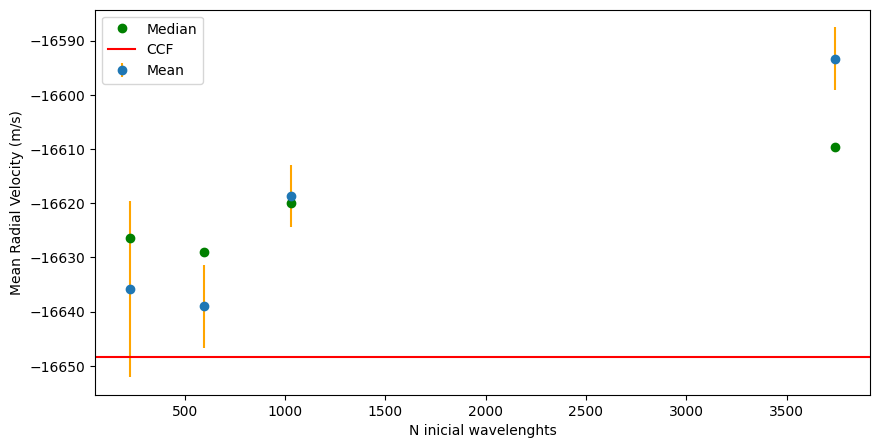

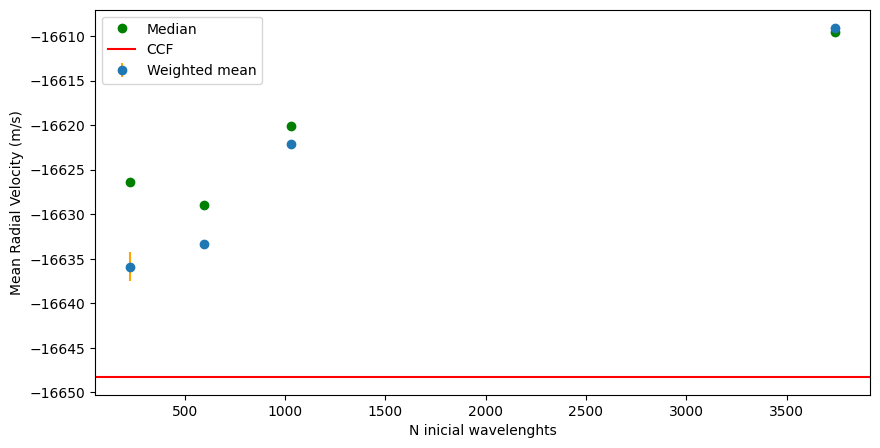

In [29]:
#plt.errorbar(N_wave,Means+ARES_RV,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means+ARES_RV,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
#plt.axhline(ARES_RV,label='ARES RV',color='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.legend()
plt.show()

#plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd_root,ecolor='orange',fmt='o',label='Weighted mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
#plt.axhline(ARES_RV,label='ARES RV',color='black')
plt.axhline(CCF, label= 'CCF', color ='red')
plt.legend()
plt.show()

## Percentage of wavelenght decrease

   N ref lines  N fitted lines  1st removal      1st %  2nd removal      2nd %
0          229             226          208  92.035398          194  85.840708
1          595             591          550  93.062606          516  87.309645
2         1030            1026          961  93.664717          902  87.914230
3         3741            3182         2975  93.494657         2771  87.083595


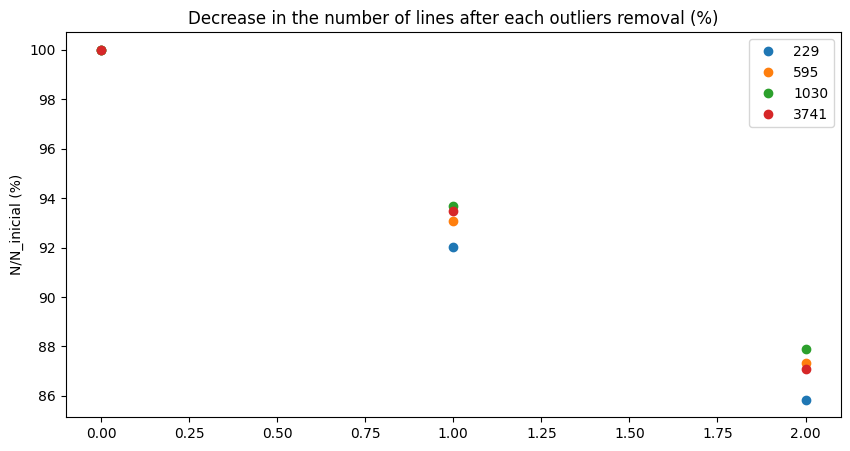

In [30]:
data = {
    'N ref lines':[229,595,1030,3741],
    'N fitted lines':[N_dim_229[0],N_dim_595[0],N_dim_1030[0],N_dim_3741[0]],
    '1st removal':[N_dim_229[1],N_dim_595[1],N_dim_1030[1],N_dim_3741[1]],
    '1st %':[N_dim_229[1]/N_dim_229[0]*100,N_dim_595[1]/N_dim_595[0]*100,N_dim_1030[1]/N_dim_1030[0]*100,N_dim_3741[1]/N_dim_3741[0]*100],
    '2nd removal':[N_dim_229[2],N_dim_595[2],N_dim_1030[2],N_dim_3741[2]],
    '2nd %':[N_dim_229[2]/N_dim_229[0]*100,N_dim_595[2]/N_dim_595[0]*100,N_dim_1030[2]/N_dim_1030[0]*100,N_dim_3741[2]/N_dim_3741[0]*100]
}

# Create a DataFrame (table) from the data
df = pd.DataFrame(data)

# Display the table
print(df)

N_dim_229_per = np.array([1,N_dim_229[1] / N_dim_229[0],N_dim_229[2] / N_dim_229[0]])*100
N_dim_595_per = np.array([1,N_dim_595[1] / N_dim_595[0],N_dim_595[2] / N_dim_595[0]])*100
N_dim_1030_per = np.array([1,N_dim_1030[1] / N_dim_1030[0],N_dim_1030[2] / N_dim_1030[0]])*100
N_dim_3741_per = np.array([1,N_dim_3741[1] / N_dim_3741[0],N_dim_3741[2] / N_dim_3741[0]])*100


plt.plot(N_dim_229_per,'o',label='229')
plt.plot(N_dim_595_per,'o',label='595')
plt.plot(N_dim_1030_per,'o',label='1030')
plt.plot(N_dim_3741_per,'o',label='3741')
plt.legend()
plt.title('Decrease in the number of lines after each outliers removal (%)')
plt.ylabel('N/N_inicial (%)')
plt.show()

## Histograms of the error

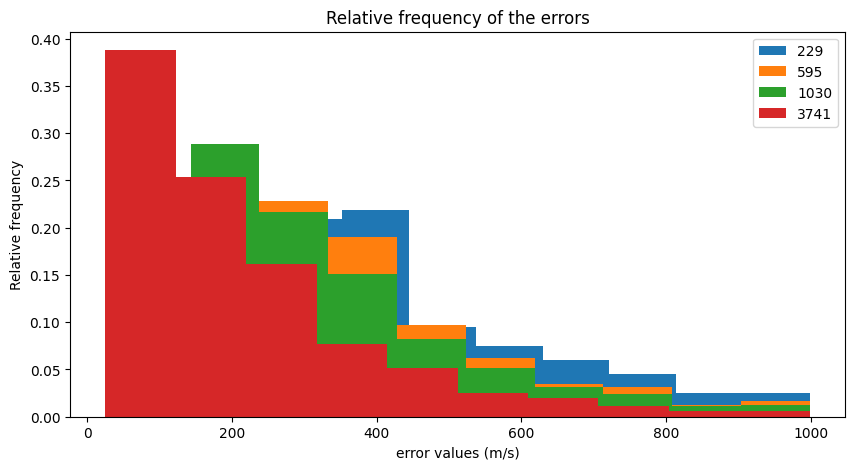

In [31]:
new_uncert_229 = [x for x in uncert_229 if x < 1e3]
plt.hist(new_uncert_229,weights=np.zeros_like(new_uncert_229) + 1. / len(new_uncert_229),label='229')

new_uncert_595 = [x for x in uncert_595 if x < 1e3]
plt.hist(new_uncert_595,weights=np.zeros_like(new_uncert_595) + 1. / len(new_uncert_595),label='595')

new_uncert_1030 = [x for x in uncert_1030 if x < 1e3]
plt.hist(new_uncert_1030,weights=np.zeros_like(new_uncert_1030) + 1. / len(new_uncert_1030),label='1030')

new_uncert_3741 = [x for x in uncert_3741 if x < 1e3]
plt.hist(new_uncert_3741,weights=np.zeros_like(new_uncert_3741) + 1. / len(new_uncert_3741),label='3741')

plt.title('Relative frequency of the errors')
plt.xlabel('error values (m/s)')
plt.ylabel('Relative frequency')
plt.legend()
plt.show()

## Uncertanty as a function of wavelenght

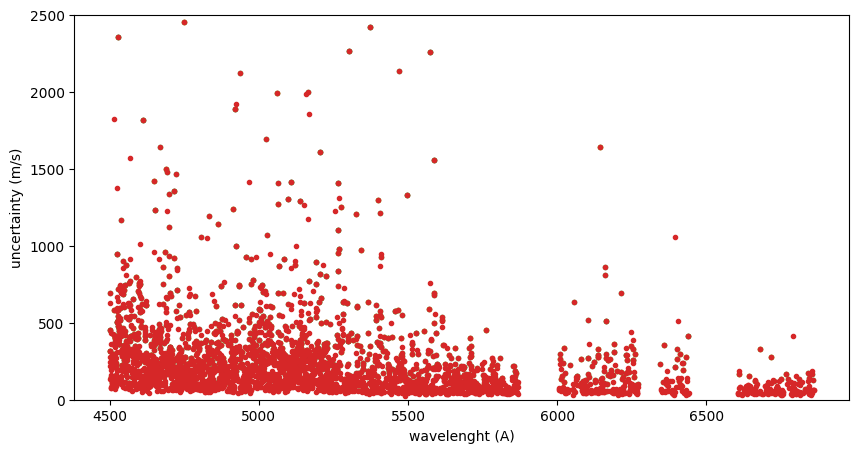

In [32]:
plt.plot(lambda_fit_229,uncert_229,'.')
plt.plot(lambda_fit_595,uncert_595,'.')
plt.plot(lambda_fit_1030,uncert_1030,'.')
plt.plot(lambda_fit_3741,uncert_3741,'.')
plt.ylim(0,2500)
plt.xlabel('wavelenght (A)')
plt.ylabel('uncertainty (m/s)')
plt.show()